In [31]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import statsmodels.api as sm
import numpy as np

In [2]:
data = pd.read_csv("/Users/kwschulz/STATS506/Stats506_Project/Dataset/data.csv")

In [3]:
data.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [4]:
data.isna().sum()

year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [5]:
data = data[["wage", "age", "education", "year"]]

In [6]:
education_map = {"1. < HS Grad":"LessThanHS","2. HS Grad":"HSGrad",
                "3. Some College":"SomeCollege", "4. College Grad":"CollegeGrad",
                "5. Advanced Degree":"AdvancedDegree"}
data['education'] = data.education.map(education_map)

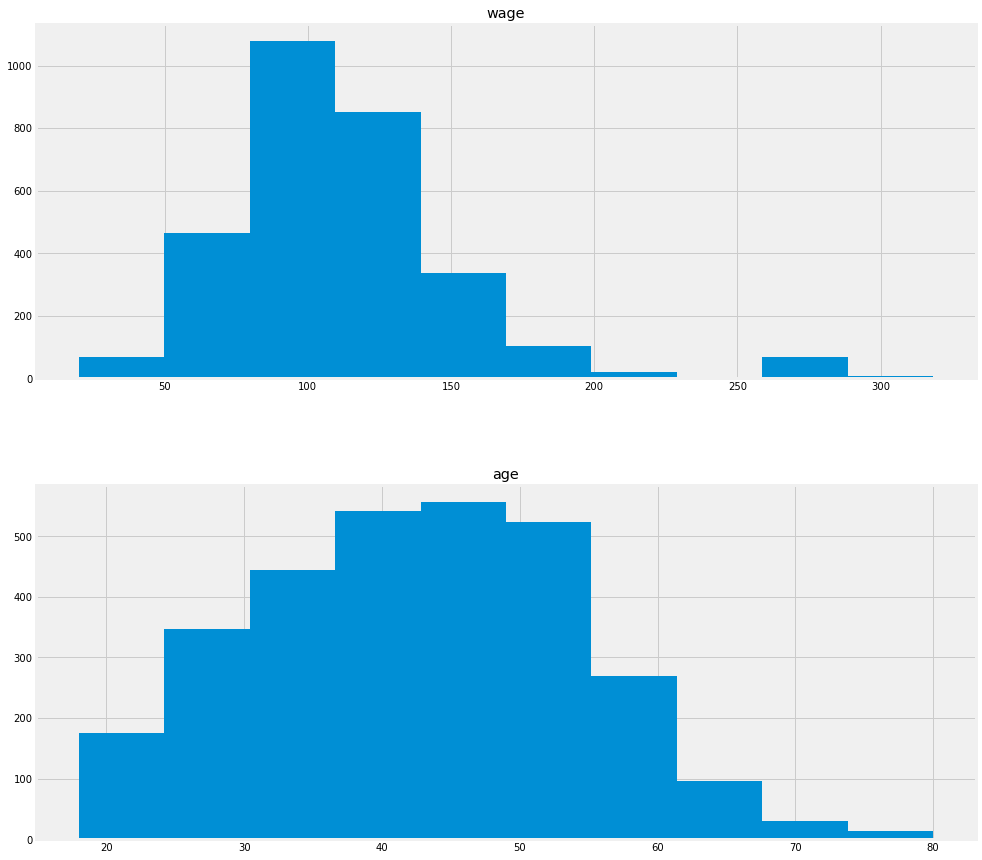

<Figure size 432x288 with 0 Axes>

In [7]:
data[["wage", "age"]].hist(layout=(2,1), figsize=(15,15))
plt.show()
plt.savefig('hist.png')

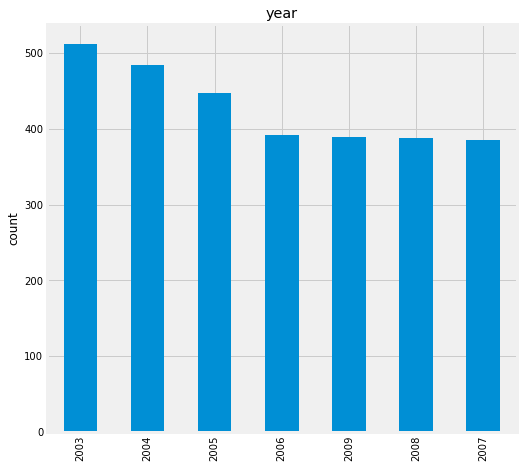

In [8]:
data.year.value_counts().plot(kind='bar', title='year', ylabel='count', figsize=(7.5,7.5))
plt.savefig('year_bar.png')

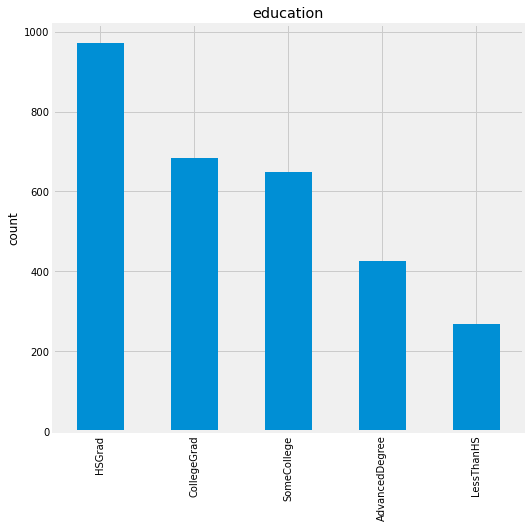

In [9]:
data.education.value_counts().plot(kind='bar', title='education', ylabel='count', figsize=(7.5,7.5))
plt.savefig('education_bar.png')

In [10]:
dummy_vars = pd.get_dummies(data.education)[['CollegeGrad', 'HSGrad',
                                             'LessThanHS', 'SomeCollege']]
data = pd.concat([data[['wage', 'age', 'year']], dummy_vars], axis=1)

In [11]:
data.head()

,wage,age,year,CollegeGrad,HSGrad,LessThanHS,SomeCollege
0,75.043154,18,2006,0,0,1,0
1,70.476020,24,2004,1,0,0,0
2,130.982177,45,2003,0,0,0,1
3,154.685293,43,2003,1,0,0,0
4,75.043154,50,2005,0,1,0,0


In [12]:
model = sm.OLS(data["wage"], sm.add_constant(data.drop('wage',axis=1))).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     177.0
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          3.16e-193
Time:                        07:04:20   Log-Likelihood:                -14994.
No. Observations:                3000   AIC:                         3.000e+04
Df Residuals:                    2993   BIC:                         3.004e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1993.2234    649.386     -3.069      0.002   -3266.512    -719.935
age             0.5621      0.057      9.838      0.000       0.450       0.674
year            1.0563      0.324      3.262      0.001       0.421       1.691
CollegeGrad   -25.1129      2.218    -11.322      0.000     -29.462     -20.764
HSGrad        -53.4560      2.092    -25.556      0.000     -57.557     -49.355
LessThanHS    -64.8537      2.804    -23.128      0.000     -70.352     -59.355
SomeCollege   -40.6192      2.250    -18.052      0.000     -45.031     -36.207
==============================================================================
Omnibus:                      994.533   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5067.917
Skew:                           1.497   Prob(JB):                         0.00
Kurtosis:                       8.619   Cond. No.                     1.99e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
data["age_cut"] = pd.cut(data.age, bins=6, labels=False)

In [15]:
model2 = sm.OLS(data["wage"], sm.add_constant(data.drop(['wage','age'],axis=1))).fit()

In [16]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     173.5
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          8.16e-190
Time:                        07:04:21   Log-Likelihood:                -15002.
No. Observations:                3000   AIC:                         3.002e+04
Df Residuals:                    2993   BIC:                         3.006e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2055.3634    650.961     -3.157      0.002   -3331.740    -778.987
year            1.0944      0.325      3.372      0.001       0.458       1.731
CollegeGrad   -25.0700      2.225    -11.267      0.000     -29.433     -20.707
HSGrad        -53.5574      2.098    -25.534      0.000     -57.670     -49.445
LessThanHS    -65.0346      2.811    -23.133      0.000     -70.547     -59.522
SomeCollege   -40.7809      2.256    -18.073      0.000     -45.205     -36.356
age_cut         5.2064      0.580      8.974      0.000       4.069       6.344
==============================================================================
Omnibus:                      995.602   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5054.921
Skew:                           1.500   Prob(JB):                         0.00
Kurtosis:                       8.607   Cond. No.                     1.99e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='age', ylabel='wage'>

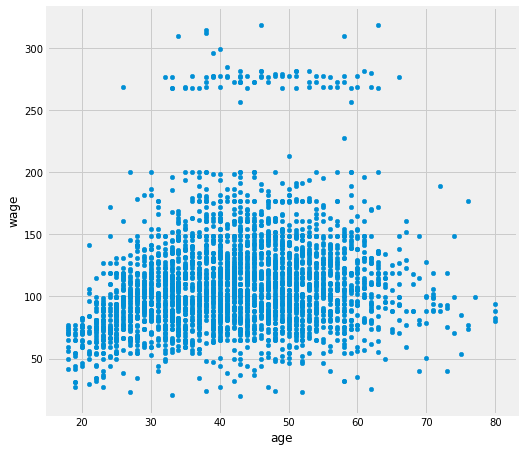

In [17]:
data.plot(x="age", y="wage", kind='scatter', figsize=(7.5,7.5))

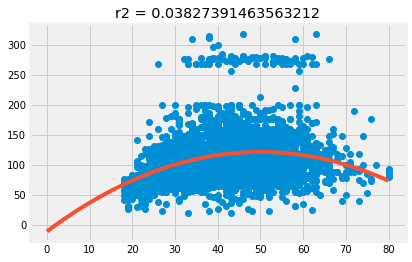

<Figure size 432x288 with 0 Axes>

In [32]:
p = np.poly1d(np.polyfit(data["age"], data["wage"], 2))
t = np.linspace(0, 80, 200)
plt.plot(data["age"], data["wage"], 'o', t, p(t), '-')
rs = sm.OLS(data["wage"], 
            np.column_stack([data["age"]**i for i in range(2)]) ).fit().rsquared
plt.title('r2 = {}'.format(rs))
plt.show()
plt.savefig('poly2.png')

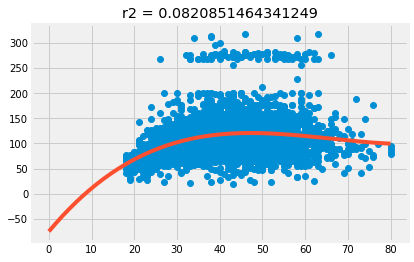

<Figure size 432x288 with 0 Axes>

In [33]:
p = np.poly1d(np.polyfit(data["age"], data["wage"], 3))
t = np.linspace(0, 80, 200)
plt.plot(data["age"], data["wage"], 'o', t, p(t), '-')
rs = sm.OLS(data["wage"], 
            np.column_stack([data["age"]**i for i in range(3)]) ).fit().rsquared
plt.title('r2 = {}'.format(rs))
plt.show()
plt.savefig('poly3.png')

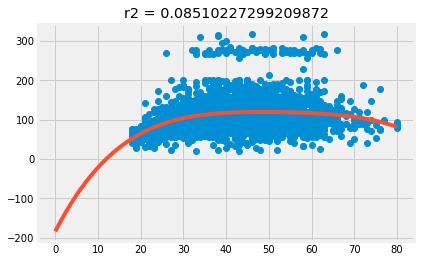

<Figure size 432x288 with 0 Axes>

In [34]:
p = np.poly1d(np.polyfit(data["age"], data["wage"], 4))
t = np.linspace(0, 80, 200)
plt.plot(data["age"], data["wage"], 'o', t, p(t), '-')
rs = sm.OLS(data["wage"], 
            np.column_stack([data["age"]**i for i in range(4)]) ).fit().rsquared
plt.title('r2 = {}'.format(rs))
plt.show()
plt.savefig('poly4.png')

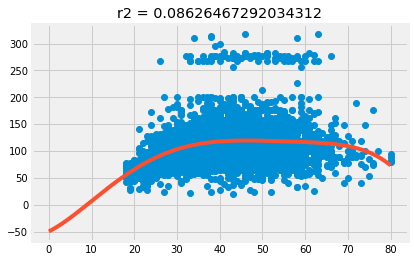

<Figure size 432x288 with 0 Axes>

In [35]:
p = np.poly1d(np.polyfit(data["age"], data["wage"], 5))
t = np.linspace(0, 80, 200)
plt.plot(data["age"], data["wage"], 'o', t, p(t), '-')
rs = sm.OLS(data["wage"], 
            np.column_stack([data["age"]**i for i in range(5)]) ).fit().rsquared
plt.title('r2 = {}'.format(rs))
plt.show()
plt.savefig('poly5.png')